<a href="https://colab.research.google.com/github/thanujan96/DevFest/blob/main/Google_DevFest_Dementia_Prediction_Final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Downloading and unzipping your dataset
We will first download and unzip our dataset


In [33]:
!mkdir mri_dataset_dir

mkdir: cannot create directory ‘mri_dataset_dir’: File exists


In [34]:
!wget -P mri_dataset_dir -q --show-progress https://talk-assets.s3.amazonaws.com/mri_dataset.zip

mri_dataset.zip.1    80%[===============>    ] 304.08M  41.3MB/s    eta 2s     ^C


In [35]:
!unzip -q mri_dataset_dir/mri_dataset.zip -d mri_dataset_dir

replace mri_dataset_dir/AugmentedAlzheimerDataset/MildDemented/00046ff7-0fae-4796-9a2b-2df47095bfe6.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Import libraries


In [36]:
import os 
import PIL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from pathlib import Path

## Let's explore our dataset

In [37]:
DATASET_ROOT_DIR = "mri_dataset_dir"
TRAIN_DATASET_DIR = "AugmentedAlzheimerDataset"
MILD_DEMENTED = "MILD_DEMENTED"
MODERATE_DEMENTED = "MODERATE_DEMENTED"
NON_DEMENTED = "NON_DEMENTED"
VERY_MILD_DEMENTED = "VERY_MILD_DEMENTED"

In [42]:
total_train_dataset = os.path.join(DATASET_ROOT_DIR,TRAIN_DATASET_DIR)
image_dataset_dir = Path(total_train_dataset)

image_filepaths = list(image_dataset_dir.glob(r"**/*.JPG")) + list(image_dataset_dir.glob(r"**/*.jpg"))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],image_filepaths))

total_dataset = {"image_filepath":image_filepaths,"label":labels}

total_dataset_df = pd.DataFrame(total_dataset)

In [43]:
total_dataset_df

,image_filepath,label
0,mri_dataset_dir/AugmentedAlzheimerDataset/Very...,VeryMildDemented
1,mri_dataset_dir/AugmentedAlzheimerDataset/Very...,VeryMildDemented
2,mri_dataset_dir/AugmentedAlzheimerDataset/Very...,VeryMildDemented
3,mri_dataset_dir/AugmentedAlzheimerDataset/Very...,VeryMildDemented
4,mri_dataset_dir/AugmentedAlzheimerDataset/Very...,VeryMildDemented
...,...,...
33979,mri_dataset_dir/AugmentedAlzheimerDataset/NonD...,NonDemented
33980,mri_dataset_dir/AugmentedAlzheimerDataset/NonD...,NonDemented
33981,mri_dataset_dir/AugmentedAlzheimerDataset/NonD...,NonDemented
33982,mri_dataset_dir/AugmentedAlzheimerDataset/NonD...,NonDemented


# Visualizing dataset

In [46]:
def visualize_images(dataset_df):

  num_samples = 8
  random_index = np.random.randint(0,len(dataset_df),8)
  fig, ax = plt.subplots(nrows=2,ncols=4,figsize=(10,10),subplot_kw={'xticks':[],'yticks':[]})

  for i,ax in enumerate(ax.flat):
    ax.imshow(plt.imread(dataset_df.image_filepath[random_index[i]]))

  plt.tight_layout()
  plt.show()

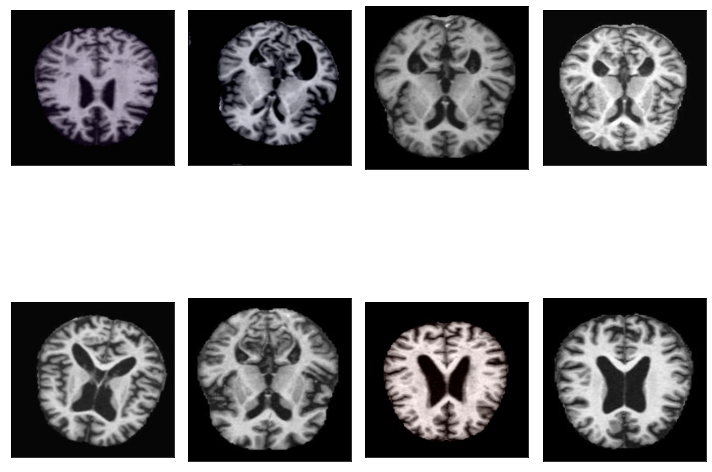

In [47]:
visualize_images(total_dataset_df)

## Preprocessing and batching

In [48]:
train_datagen = ImageDataGenerator(rescale = 1./255,validation_split=0.2)

In [49]:
train_image_datset = train_datagen.flow_from_directory(
    total_train_dataset,
    target_size = (224,224),
    batch_size = 32,class_mode = "categorical",
    subset="training"
)

Found 27188 images belonging to 4 classes.


In [50]:
validation_image_datset = train_datagen.flow_from_directory(
    total_train_dataset,
    target_size = (224,224),
    batch_size = 32,class_mode = "categorical",
    subset="validation"
)

Found 6796 images belonging to 4 classes.


## Let's visualize our preprocessed data

Let's have a look at our training and validation set
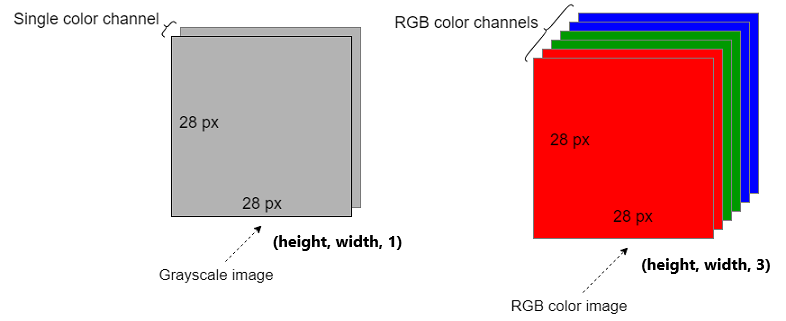

---



## Preprocess and batch training set

## Defining our model architecture

We will be creating a **Convolutional Neural Network** to perform our classification task.
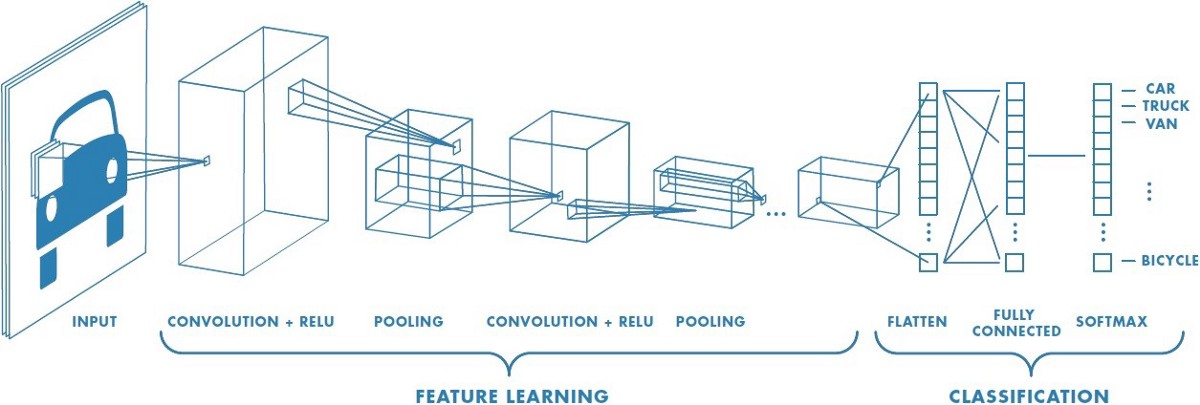


In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout,Reshape, GlobalAveragePooling2D

In [52]:
model = Sequential([
    
    Conv2D(16,(3,3),activation='relu',input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(16,(3,3),activation='relu',input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.2),
    Dense(4,activation='softmax')


])


In [54]:
model.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam())

In [57]:
history = model.fit(train_image_datset,validation_data=validation_image_datset)

850/850 [==============================] - 73s 75ms/step - loss: 0.8974 - val_loss: 0.5578


In [ ]:
# run_inference(model,validation_imagvalidation_image_datsete_dataset,num_samples=5)

## Let's test our model

## Now let's train a pretrained model